# Aprendizaje supervisado

## Librerias

In [4]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

## Datos

Vamos a realizar el proceso con dos selección de variables distintas para ver con cual obtenemos mejores resultados:

* Selección 1: Las 25 variables más importantes obtenidas en el apartado de "Selección de Variables" del primer trimestre.

* Selección 2: Formada por las variables arrival_month, deposit_type_Non Refund, is_repeated_guest, reserverd/assigned, hotel_Resort Hotel.

In [5]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Selección de datos 1

In [6]:
X1 = data.iloc[:,2:30].values
Y1 = data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=1)
print('Train', X_train1.shape, y_train1.shape)
print('Test', X_test1.shape, y_test1.shape)

Train (20100, 28) (20100,)
Test (9900, 28) (9900,)


### Selección de datos 2

In [8]:
#Vars selected
vars_s=['arrival_month','deposit_type_Non Refund','is_repeated_guest','reserverd/assigned','hotel_Resort Hotel']

Y2 = data.is_canceled
X2 = data[vars_s]

In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=1)
print('Train', X_train2.shape, y_train2.shape)
print('Test', X_test2.shape, y_test2.shape)

Train (20100, 5) (20100,)
Test (9900, 5) (9900,)


## Regresion Logística

Mediante la RL se pretende modelar la probabilidad de que ocurra el hecho en cuestión como función de ciertas variables que se presumen relevantes o influyentes. Por lo tanto, la RL consiste en obtener una función logística de las variables independientes que permita clasificar a los individuos en una de las dos subpoblaciones o grupos establecidos por los dos va­lores de la variable dependiente.

La función logística es aquella que halla, para cada individuo según los valores de una serie de variables (Xi), la probabilidad (p) de que presente el efecto estudiado. Una transformación logarítmica de dicha ecuación, a la que se le llama logit. De aquí surge la ecuación de la regresión logística, que es parecida a la ecuación de la regresión lineal múltiple.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
    
def evaluate_model(X_train, y_train,X_test, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))
   
    print(classification_report(y_test, preds))
    
    logit_roc_auc = roc_auc_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Balanceado

Para el balanceado de los datos utilizaremos la tecnica SMOTE (Synthetic Minority Oversampling Technique).

SMOTE es una técnica estadística de sobremuestreo de minorías sintéticas para aumentar el número de casos de un conjunto de datos de forma equilibrada. El módulo funciona cuando genera nuevas instancias a partir de casos minoritarios existentes que se proporcionan como entrada. SMOTE no cambia el número de casos de mayoría.

Las instancias nuevas no son meras copias de los casos minoritarios existentes. En su lugar, el algoritmo toma muestras del espacio de características de cada clase de destino y de sus vecinos más próximos. Luego, el algoritmo genera nuevos ejemplos que combinan las características del caso que nos ocupa con características de sus vecinos. Este enfoque aumenta las características disponibles para cada clase y hace que las muestras sean más generales.

In [11]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train1, y_train1)

os_data_2X,os_data_2y=os.fit_sample(X_train2, y_train2)

### Selección de datos 1

Training Score:0.928385107896609
Cross V Score: 0.9276737016836614 +/- 0.008534129491293148
Testing Score: 0.9281818181818182
Cross & Test Diff: -0.000508116498156852
Standard Deviations Away: -0.05953934712090463
[[5955  343]
 [ 368 3234]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6298
         1.0       0.90      0.90      0.90      3602

    accuracy                           0.93      9900
   macro avg       0.92      0.92      0.92      9900
weighted avg       0.93      0.93      0.93      9900



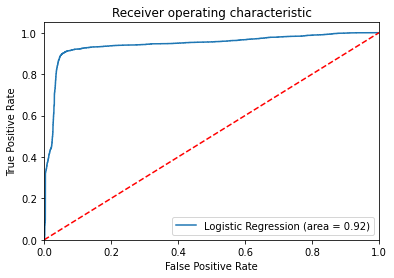

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

reg_log = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)
evaluate_model(os_data_X, os_data_y, X_test1, y_test1, reg_log)

### Selección de datos 2

Training Score:0.6611730298000158
Cross V Score: 0.6611730298000159 +/- 0.0031105038921746837
Testing Score: 0.7540404040404041
Cross & Test Diff: -0.09286737424038816
Standard Deviations Away: -29.85605466497606
[[6289    9]
 [2426 1176]]
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84      6298
         1.0       0.99      0.33      0.49      3602

    accuracy                           0.75      9900
   macro avg       0.86      0.66      0.66      9900
weighted avg       0.82      0.75      0.71      9900



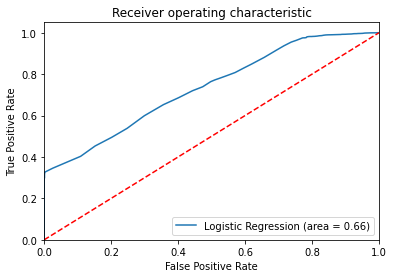

In [13]:
reg_log = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)
evaluate_model(os_data_2X, os_data_2y, X_test2, y_test2, reg_log)

## KNN

El algoritmo KNN (K Nearest Neighbours) clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

En contraste con otros algoritmos de aprendizaje supervisado, K-NN no genera un modelo fruto del aprendizaje con datos de entrenamiento, sino que el aprendizaje sucede en el mismo momento en el que se prueban los datos de test. A este tipo de algoritmos se les llama lazy learning methods.

### Selección de datos 1

In [12]:
X_train = X_train1
y_train = y_train1

X_test = X_test1
y_test = y_test1

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

Primero estandarizamos los valores.

Ahora vamos a buscar cual es el valor de K más óptimo.

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_stand, y_train)
    pred_i = knn.predict(X_test_stand)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

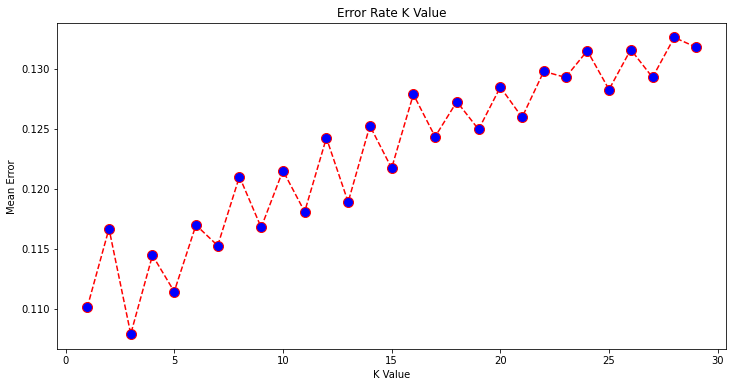

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Nos quedamos con K = 3 para entrenar el modelo.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_stand, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = classifier.predict(X_test_stand)

Sacamos el informe de clasificación que hemos obtenido:

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5919  379]
 [ 689 2913]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      6298
         1.0       0.88      0.81      0.85      3602

    accuracy                           0.89      9900
   macro avg       0.89      0.87      0.88      9900
weighted avg       0.89      0.89      0.89      9900



De esta forma obtenemos una precisión de 89% en ambas clases con un recall de 94% y 80% respectivamente.
Lo que significa que encontramos el 80% de casos en los que se cancela la reserva, y predecimos correctamente el 90% de esos.

(El recall nos indica el porcentaje encontrado de esa clase con respecto a todos los elementos de esa misma clase)

### Selección de datos 2

In [19]:
X_train = X_train2
y_train = y_train2

X_test = X_test2
y_test = y_test2

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

Primero estandarizamos los valores.

Ahora vamos a buscar cual es el valor de K más óptimo.

In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_stand, y_train)
    pred_i = knn.predict(X_test_stand)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

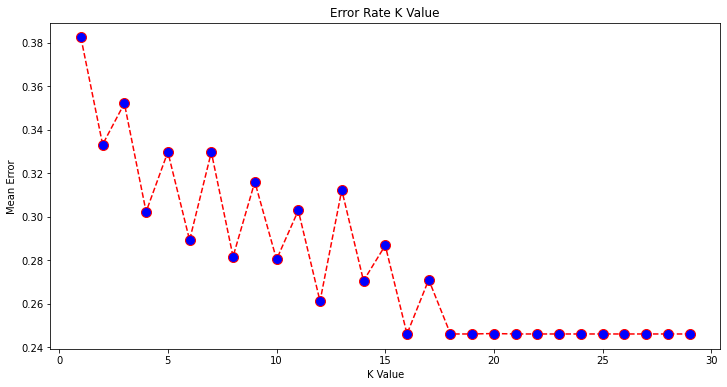

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Vemos que a partir de K = 18 el valor no se mejora, por lo que nos quedamos con ese valor para K.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train_stand, y_train)

KNeighborsClassifier(n_neighbors=16)

In [27]:
y_pred = classifier.predict(X_test_stand)

Sacamos el informe de clasificación que hemos obtenido:

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6277   21]
 [2415 1187]]
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84      6298
         1.0       0.98      0.33      0.49      3602

    accuracy                           0.75      9900
   macro avg       0.85      0.66      0.67      9900
weighted avg       0.82      0.75      0.71      9900



Con esta selección de variables obtenemos más precisión en cada una de las clases, pero un recall mucho más bajo, por lo que no está encontrado todos los elementos de la clase correspondiente.

Concluimos por lo tanto que se obtienen mejores resultados con la primera selección de datos, donde podemos decir sacamos un buen resultado.